In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv",index_col=0)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [4]:
miss_vals =["Nan","?","missing"] 
df.replace(miss_vals,np.NaN,inplace=True)

In [5]:
df.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
def company_split(x):
    return x.split()[0]

CarCompany=df.CarName.apply(company_split)
df.insert(2,"CarCompany",CarCompany)

In [7]:
df

,symboling,CarName,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [8]:
#Handling Outliers

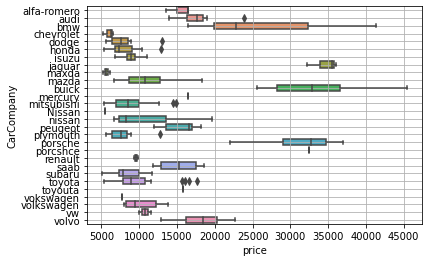

In [9]:
plt.Figure(figsize=(20,20))
sns.boxplot(data = df, x = 'price', y = 'CarCompany' )
plt.grid()

In [10]:
# toyota
df[(df['CarCompany'] == 'toyota') & (df['price'] > 15000)]

,symboling,CarName,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
173,2,toyota cressida,toyota,gas,std,two,convertible,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,17669.0
179,3,toyota corolla liftback,toyota,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.3,161,5200,20,24,16558.0
180,3,toyota corona,toyota,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.3,161,5200,19,24,15998.0
181,-1,toyota starlet,toyota,gas,std,four,sedan,rwd,front,104.5,...,171,mpfi,3.27,3.35,9.2,156,5200,20,24,15690.0


In [11]:
df.drop([173,179,180,181],axis=0,inplace=True)

In [12]:
# audi
df[(df['CarCompany'] == 'audi') & (df['price'] > 20000)]

,symboling,CarName,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
9,1,audi 4000,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875.0


In [13]:
df.drop([9],axis=0,inplace=True)

In [14]:
# dodge
df[(df['CarCompany'] == 'dodge') & (df['price'] > 10000)]

,symboling,CarName,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
30,3,dodge coronet custom (sw),dodge,gas,turbo,two,hatchback,fwd,front,95.9,...,156,mfi,3.6,3.9,7.0,145,5000,19,24,12964.0


In [15]:
df.drop([30],axis=0,inplace=True)

In [16]:
#honda
df[(df['CarCompany'] == 'honda') & (df['price'] > 12000)]

,symboling,CarName,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
42,0,honda civic,honda,gas,std,four,sedan,fwd,front,96.5,...,110,mpfi,3.15,3.58,9.0,101,5800,24,28,12945.0


In [17]:
#mitsubishi
df[(df['CarCompany'] == 'mitsubishi') & (df['price'] > 14000)]

,symboling,CarName,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
84,3,mitsubishi g4,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,14869.0
85,3,mitsubishi mirage g4,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,14489.0


In [18]:
#plymouth
df[(df['CarCompany'] == 'plymouth') & (df['price'] > 10000)]

,symboling,CarName,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
125,3,plymouth duster,plymouth,gas,turbo,two,hatchback,rwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,12764.0


In [19]:
df.drop([42,84,85,125],axis=0,inplace=True)

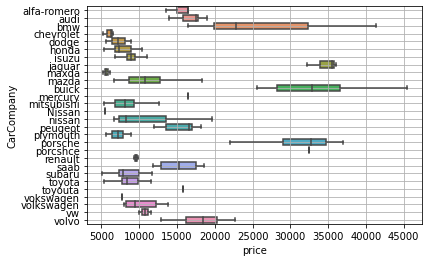

In [20]:
plt.Figure(figsize=(20,20))
sns.boxplot(data = df, x = 'price', y = 'CarCompany' )
plt.grid()

In [21]:
#Distinguishing the Numerical and Categorical Value

In [22]:
df_numerical = df.select_dtypes(['int64','float64'])
df_category = df.select_dtypes(object)

In [23]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit_transform(df_category['fueltype'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [24]:
for ele in df_category:
    LE = LabelEncoder()
    df_category[ele] = LE.fit_transform(df_category[ele])

In [25]:
df_category.head()

,CarName,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
car_ID,,,,,,,,,,,
1,2,1,1,0,1,0,2,0,0,2,4
2,3,1,1,0,1,0,2,0,0,2,4
3,1,1,1,0,1,2,2,0,5,3,4
4,4,2,1,0,0,3,1,0,3,2,4
5,5,2,1,0,0,3,0,0,3,1,4


In [26]:
df = pd.concat([df_category,df_numerical],axis=1)

In [27]:
df.head()

,CarName,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,2,1,1,0,1,0,2,0,0,2,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,1,1,0,1,0,2,0,0,2,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,1,1,0,1,2,2,0,5,3,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
4,4,2,1,0,0,3,1,0,3,2,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
5,5,2,1,0,0,3,0,0,3,1,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [28]:
# split X & Y
x=df.iloc[:,:-1]
x.T

car_ID,1,2,3,4,5,6,7,8,10,11,...,196,197,198,199,200,201,202,203,204,205
CarName,2.00,3.00,1.00,4.00,5.00,8.00,5.00,6.00,7.00,9.0,...,134.00,136.00,137.00,139.00,140.00,135.00,134.00,136.00,138.00,139.00
CarCompany,1.00,1.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,3.0,...,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00
fueltype,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00
aspiration,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.0,...,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,1.00
doornumber,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
carbody,0.00,0.00,2.00,3.00,3.00,3.00,3.00,4.00,2.00,3.0,...,4.00,3.00,4.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00
drivewheel,2.00,2.00,2.00,1.00,0.00,1.00,1.00,1.00,0.00,2.0,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
enginelocation,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
enginetype,0.00,0.00,5.00,3.00,3.00,3.00,3.00,3.00,3.00,3.0,...,3.00,3.00,3.00,3.00,3.00,3.00,3.00,5.00,3.00,3.00
cylindernumber,2.00,2.00,3.00,2.00,1.00,1.00,1.00,1.00,1.00,2.0,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,2.00


In [29]:
y=df.iloc[:,-1]
y

car_ID
1      13495.0
2      16500.0
3      16500.0
4      13950.0
5      17450.0
        ...   
201    16845.0
202    19045.0
203    21485.0
204    22470.0
205    22625.0
Name: price, Length: 195, dtype: float64

In [30]:
# Applying train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=1)

In [31]:
# Step1:- import model

from sklearn.linear_model import LinearRegression

# Step2:- initilize a model

lr=LinearRegression()

# Step3:- Train a model

lr.fit(xtrain,ytrain)

# Step4:- Prediction

ypred=lr.predict(xtest)

In [32]:
from sklearn.metrics import r2_score

In [33]:
print("Acurracy :",r2_score(ytest,ypred))

Acurracy : 0.8841550186575806


In [53]:
def Get_Max_Test(Values_List):
    max_val = 0
    max_index = 0
    for i in Values_List:
        if max_val < i[-1]:
            max_val = i[-1]
            max_index = Values_List.index(i)
    return Values_List[max_index]

def Get_Max_Train(Values_List):
    max_val = 0
    max_index = 0
    for i in Values_List:
        if max_val < i[1]:
            max_val = i[1]
            max_index = Values_List.index(i)
    return Values_List[max_index]

In [35]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(xtrain,ytrain)


LinearRegression()

In [36]:
train=linreg.score(xtrain,ytrain)
test=linreg.score(xtest,ytest)
print(f"Training result -:{train}")
print(f"Test result -:{test}")

Training result -:0.900529598152704
Test result -:0.8841550186575806


In [37]:
linreg.coef_

array([-1.45577051e+02,  6.36422129e+02, -6.45757604e+03,  1.62686613e+03,
       -4.41905557e+02, -4.40213593e+02,  1.51791636e+03,  1.20094748e+04,
       -2.07708470e+02,  7.79711443e+02, -1.42793441e+02,  1.36375307e+02,
        1.52258734e+02, -3.33025821e+01,  5.41275002e+02,  3.03641529e+02,
        7.38552529e-01,  1.20206832e+02, -8.99151604e+02, -2.69510458e+03,
       -3.66554552e+02, -1.95539404e+00,  1.84180413e+00, -2.24202083e+02,
        1.90181771e+02])

In [38]:
from sklearn.linear_model import Ridge , Lasso

In [74]:
#create l2 model(ridge)
l2=Ridge(alpha=2)
l2.fit(xtrain,ytrain)

Ridge(alpha=2)

In [75]:
train=l2.score(xtrain,ytrain)
test=l2.score(xtest,ytest)
print(f"Training result -:{train}")
print(f"Test result -:{test}")

Training result -:0.8925315951821514
Test result -:0.9000179427759865


In [84]:
#best value of alpha
ridge_list=[]
for i in range(1,10):
    l2=Ridge(alpha=i)
    l2.fit(xtrain,ytrain)
    
    train=l2.score(xtrain,ytrain)
    test=l2.score(xtest,ytest)
    ridge_list.append([i,train,test])
   # print(f"alpha value : {i} Test Result : {test}")

In [77]:
print("Best Train : ",Get_Max_Train(ridge_list))
print("Best Test  : ",Get_Max_Test(ridge_list))

Best Train :  [1, 0.896370803440633, 0.89842018826177]
Best Test  :  [2, 0.8925315951821514, 0.9000179427759865]


In [78]:
l2.coef_

array([-6.99892945e+01,  2.42007923e+02, -9.19974569e+01,  2.41935562e+02,
       -4.69345334e+02, -6.86420039e+02,  9.56972724e+02,  1.72520664e+03,
       -4.12556342e+01,  1.66629232e+02, -2.39826939e+02,  2.53534917e+02,
        1.86506772e+02, -5.70402471e+01,  1.99032419e+02,  3.90006679e+02,
        1.02674917e+00,  9.42694093e+01,  2.66140385e+02, -1.59887634e+03,
        2.60346491e+02,  5.51978928e+01,  1.68854499e+00, -2.83884765e+02,
        2.19401293e+02])

In [79]:
l1=Lasso(alpha=45)
l1.fit(xtrain,ytrain)
test=l1.score(xtest,ytest)
print(f"Test result -:{test}")

Test result -:0.9036736814575271


In [83]:
#best value of alpha (Lass0)
lasso_list=[]
for i in range(1,300):
    l1=Lasso(alpha=i)
    l1.fit(xtrain,ytrain)
    
    train=l1.score(xtrain,ytrain)
    test=l1.score(xtest,ytest)
    lasso_list.append([i,train,test])
  #  print(f"alpha value : {i} Test Result : {test}")

In [81]:
print("Best Train : ",Get_Max_Train(lasso_list))
print("Best Test  : ",Get_Max_Test(lasso_list))

Best Train :  [1, 0.9005001233709397, 0.8852625172420354]
Best Test  :  [45, 0.8931868773840552, 0.9036736814575271]


In [82]:
l1.coef_

array([ -23.41101203,    0.        ,   -0.        ,   -0.        ,
         -0.        , -336.54904757,    0.        ,    0.        ,
          0.        ,    0.        ,   -0.        ,    0.        ,
        100.9229831 ,   -0.        ,    0.        ,  205.11160653,
          1.59259277,   86.75502269,    0.        ,   -0.        ,
        248.17394292,   65.11665329,    1.58947482,  -42.92833331,
          0.        ])